In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)


In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
#Replacing Gb and kg of columns Ram and Weight with " "
df['Ram'] = df['Ram'].str.replace('GB',"")
df['Weight'] = df['Weight'].str.replace('kg',"")
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [10]:
## converting data type of columns
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

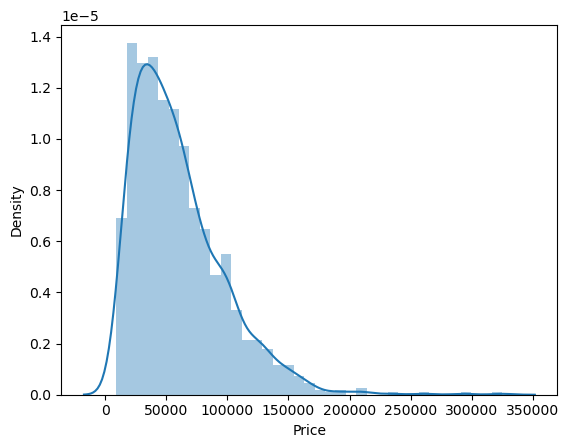

In [11]:
sns.distplot(df['Price'])

### Column - Company 

<AxesSubplot:>

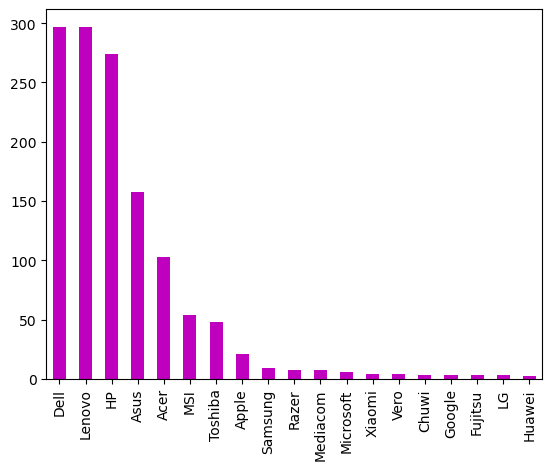

In [12]:
#Univariant 
df['Company'].value_counts().plot(kind='bar',color='m')

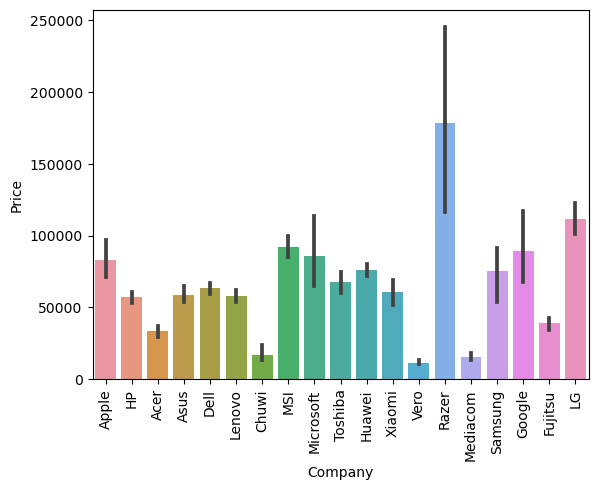

In [13]:
#Bivariant
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Column - TypeName


<AxesSubplot:>

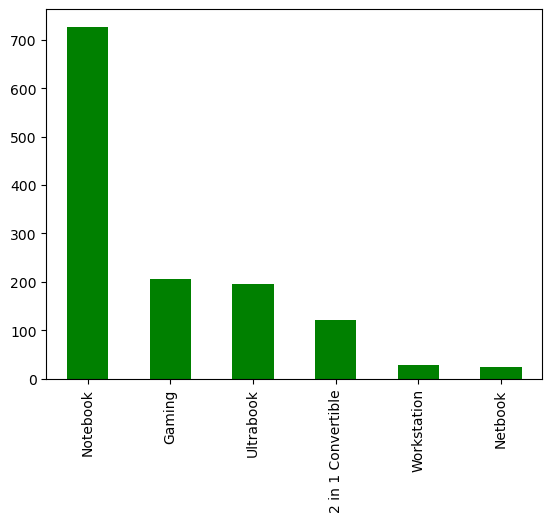

In [14]:
#Univariant
df['TypeName'].value_counts().plot(kind='bar',color='g')

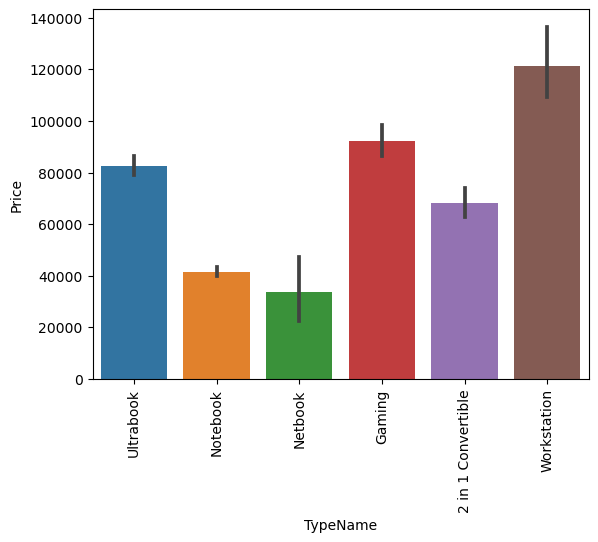

In [15]:
#Bivariant
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Column - Inches


<AxesSubplot:xlabel='Inches', ylabel='Density'>

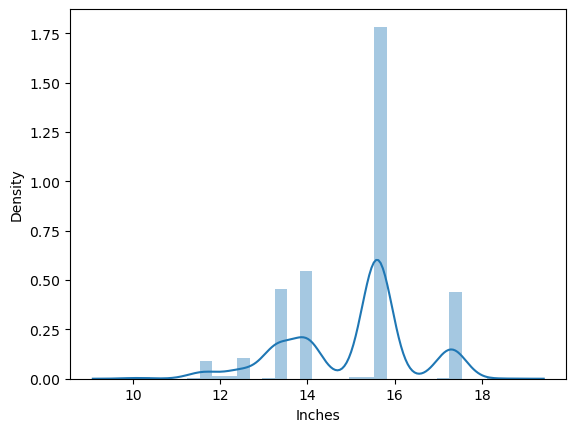

In [16]:
#Univariant
sns.distplot(df['Inches'])

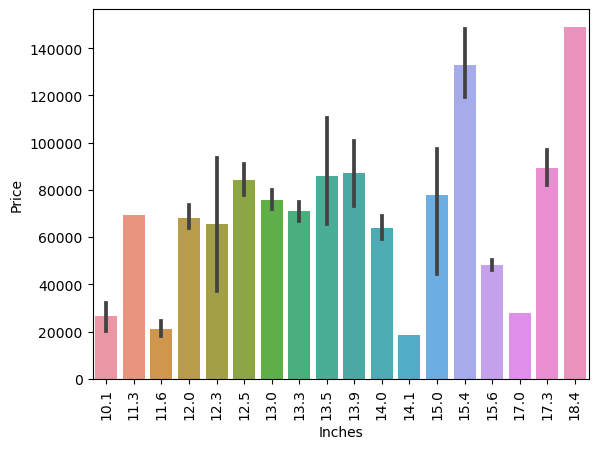

In [17]:
#Bivariant
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Column - ScreenResolution

In [18]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [19]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot:>

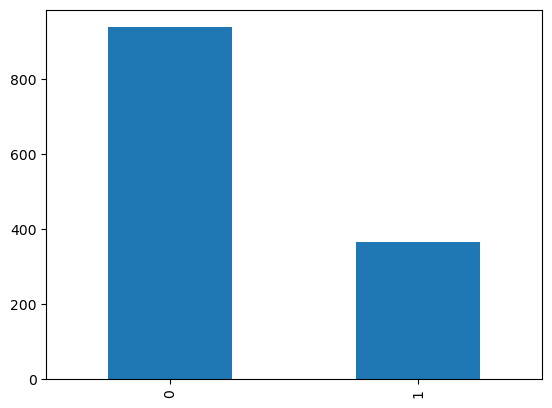

In [20]:
df["Ips"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

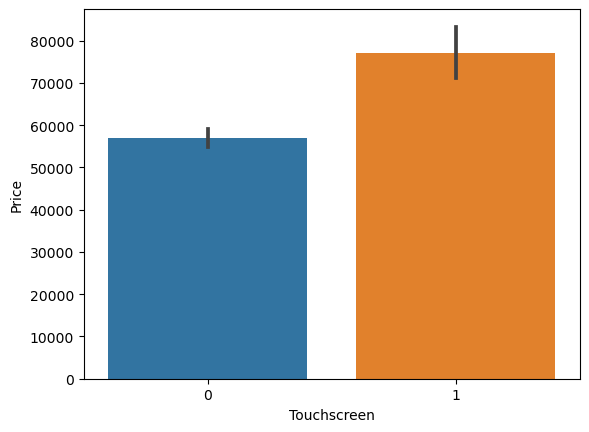

In [21]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

<AxesSubplot:xlabel='Ips', ylabel='Price'>

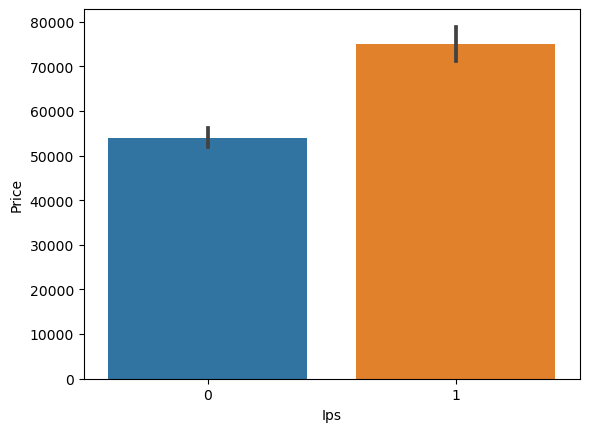

In [22]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [23]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [24]:
df['X_res']=new[0]
df["Y_res"]=new[1].astype('int32')


In [25]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])

In [26]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [27]:
df['X_res']=df['X_res'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Ips               1303 non-null   int64  
 12  Touchscreen       1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [28]:
df['ppi']=(((df['X_res']**2)+(df['Y_res']**2))**0.5/df['Inches']).astype('float32')

In [29]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Ips            0.252208
Touchscreen    0.191226
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [30]:
df.drop(columns=['ScreenResolution'],axis=1,inplace=True)
df.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600,226.983002
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [31]:
df.drop(columns=['Inches','X_res','Y_res'],axis=1,inplace=True)

In [32]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983002
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


### Column - CPU

In [33]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [34]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return "AMD_Processor"
        

<AxesSubplot:>

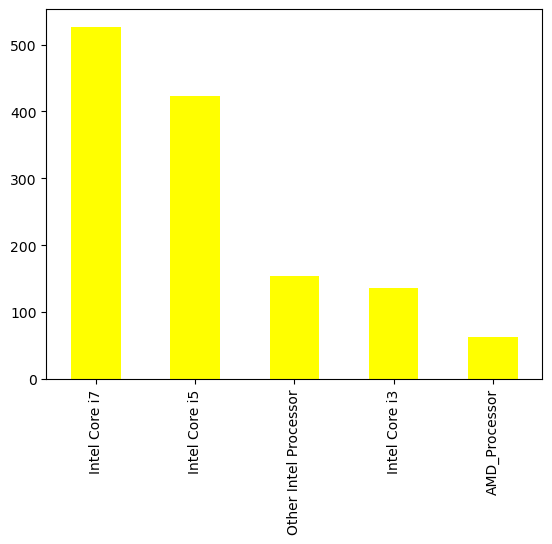

In [35]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df['Cpu brand'].value_counts().plot(kind='bar',color='yellow')

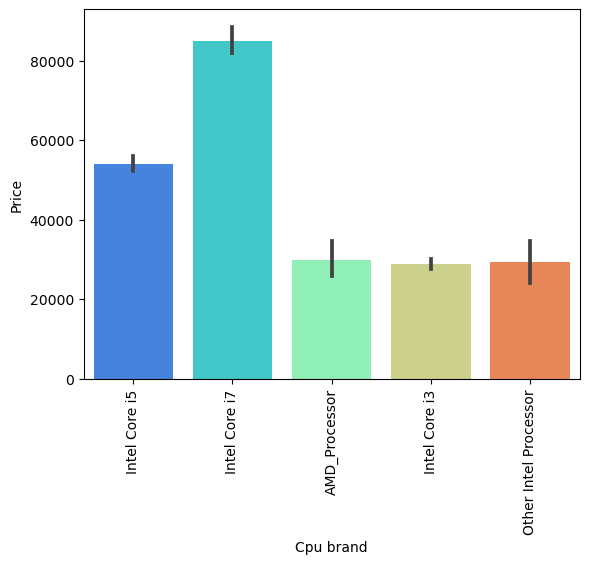

In [36]:
sns.barplot(x=df['Cpu brand'],y=df['Price'],palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

In [37]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

### Column - Ram

<AxesSubplot:>

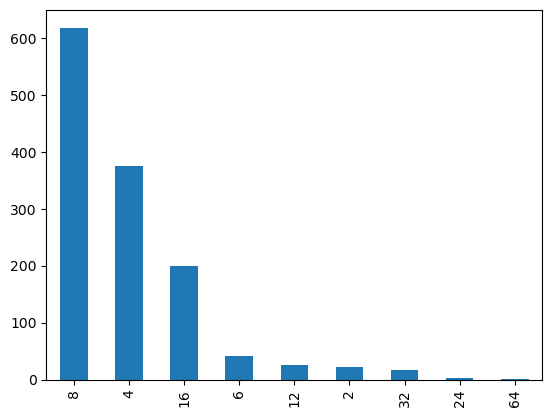

In [38]:
#Univariant
df['Ram'].value_counts().plot(kind='bar')

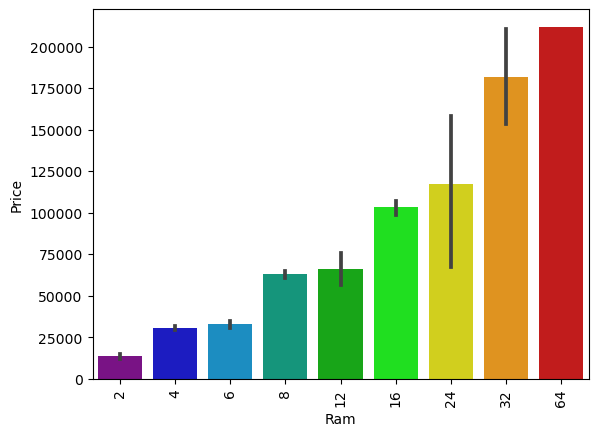

In [39]:
sns.barplot(x=df['Ram'],y=df['Price'],palette='nipy_spectral')
plt.xticks(rotation='vertical')
plt.show()

### Column - Memory

In [40]:
df['Memory']=df['Memory'].astype(str).replace('\.0','')
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split("+",n=1,expand=True)
df["first"]=new[0]
df['first']=df['first'].str.strip()
df["second"]=new[1]

In [41]:
df["Layer1HDD"]=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df["Layer1SSD"]=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df["Layer1Hybrid"]=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"]=df['first'].apply(lambda x:1 if "Flash Storage" in x else 0)
df['first']=df['first'].str.replace(r'\D','')

In [42]:
df['second'].fillna("0",inplace=True)
df.second.unique()

array(['0', '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1.0000 Hybrid'], dtype=object)

In [43]:
df["Layer2HDD"]=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df["Layer2SSD"]=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df["Layer2Hybrid"]=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"]=df['second'].apply(lambda x:1 if "Flash Storage" in x else 0)
df['second']=df['second'].str.replace(r'\D','')


In [44]:
df['first']=df['first'].astype('int32')
df['second']=df['second'].astype('int32')

In [45]:
df['HDD']=(df['first']*df["Layer1HDD"]+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df["Layer1SSD"]+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df["Layer1Hybrid"]+df['second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df["Layer1Flash_Storage"]+df['second']*df['Layer2Flash_Storage'])

In [46]:
df.drop(columns=['first','second','Layer1HDD','Layer1SSD',
                'Layer2HDD','Layer2SSD','Layer1Hybrid','Layer2Hybrid','Layer1Flash_Storage','Layer2Flash_Storage'],inplace=True)

In [47]:
df.drop(columns=['Memory'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983002,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212006,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534622,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983002,Intel Core i5,0,256,0,0


In [49]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Ips              0.252208
Touchscreen      0.191226
ppi              0.473487
HDD             -0.093701
SSD              0.670799
Hybrid           0.008747
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [50]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [51]:
df['Gpu_Brand']=df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu_Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu_Brand, Length: 1303, dtype: object

In [52]:
df=df[df['Gpu_Brand']!='ARM']
df['Gpu_Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

<AxesSubplot:>

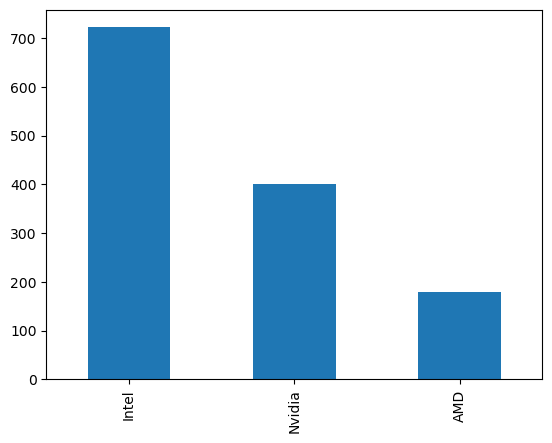

In [53]:
df['Gpu_Brand'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Gpu_Brand', ylabel='Price'>

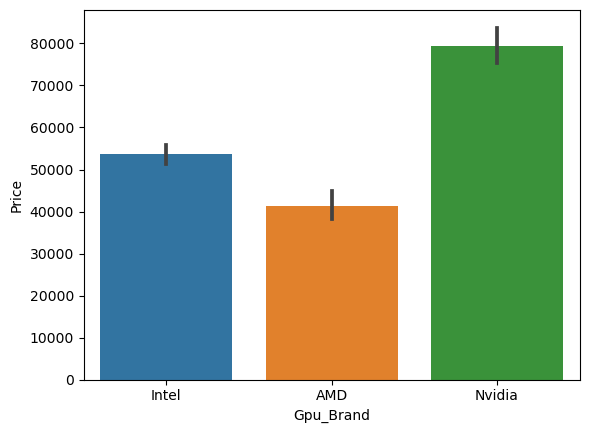

In [54]:
sns.barplot(x=df['Gpu_Brand'],y=df['Price'])

In [55]:
df.drop(columns=['Gpu'],inplace=True)
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,1,0,226.983002,Intel Core i5,0,128,Intel


### Columns-OPSys

In [56]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [57]:
def cat_ops(inp):
    if inp=="Windows 10" or inp=="Windows 7" or inp=="Windows 10 S ":
        return "Windows"
    else:
        if inp=="Mac OS X " or inp=="macOS":
            return "Mac"
        else:
            return "Other OS"

<AxesSubplot:>

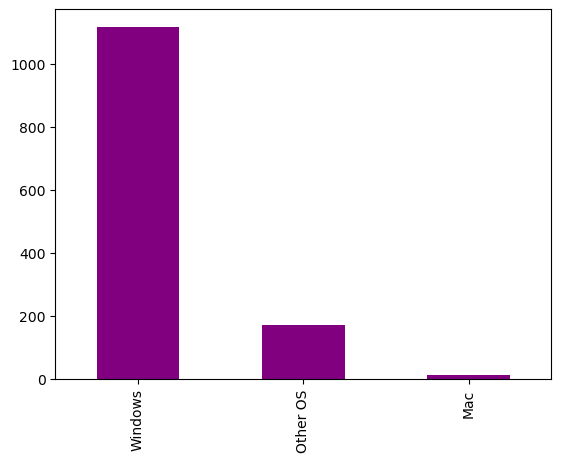

In [58]:
df['Os']=df['OpSys'].apply(cat_ops)
df['Os'].value_counts().plot(kind='bar',color='purple')

In [59]:
df.drop(columns=['OpSys'],inplace=True)

<AxesSubplot:xlabel='Os', ylabel='Price'>

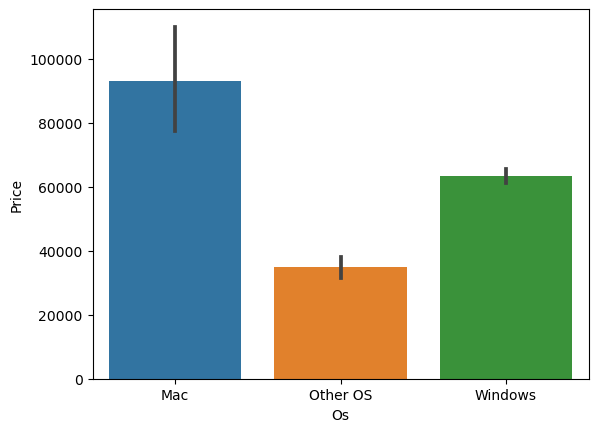

In [60]:
sns.barplot(x=df['Os'],y=df['Price'])

### Column - Weight

<AxesSubplot:ylabel='Density'>

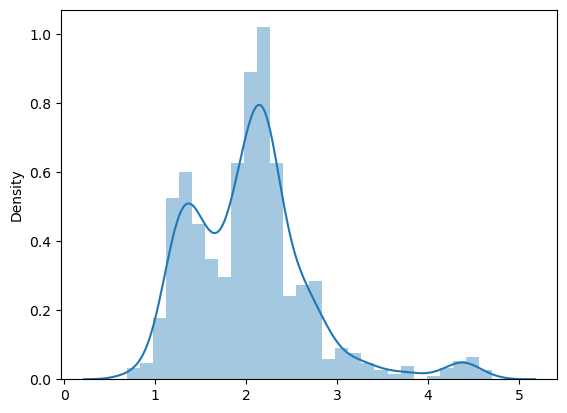

In [61]:
sns.distplot(x=df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

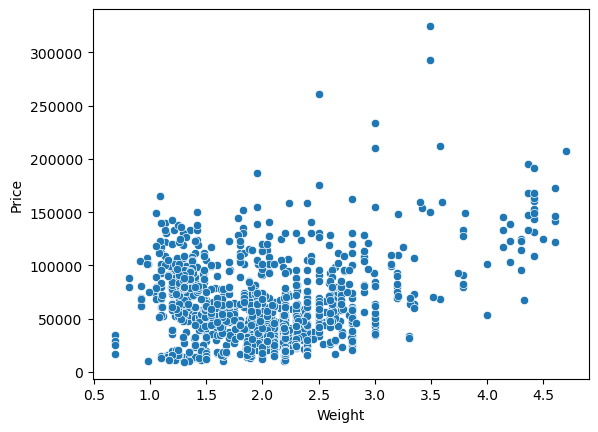

In [62]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<AxesSubplot:>

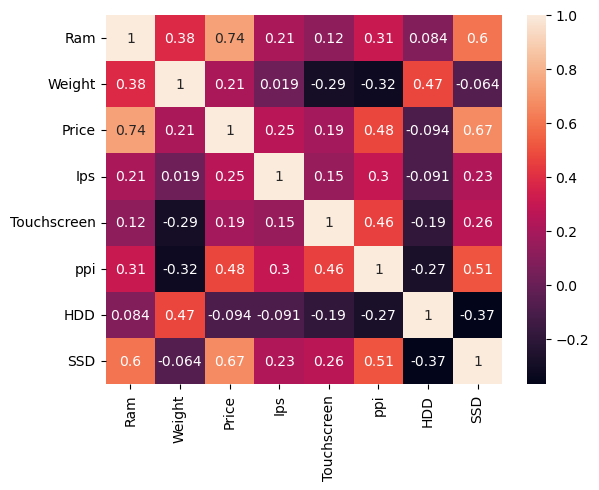

In [63]:
sns.heatmap(df.corr(),annot=True)

### Target Column - Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

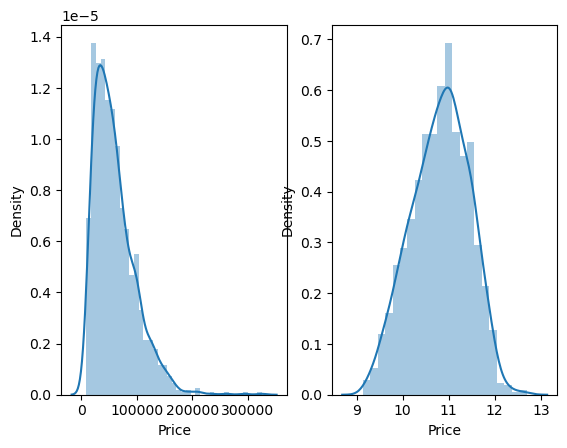

In [64]:
fig=plt.subplot(1,2,1)
plt.subplot(121)
sns.distplot(df['Price'])
plt.subplot(122)
sns.distplot(np.log(df['Price']))

### Spliting Data into X and Y

In [65]:
y=df['Price']
X=df.drop(columns=['Price'])


In [66]:
X.head()

,Company,TypeName,Ram,Weight,Ips,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,1,0,226.983002,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.212006,Intel Core i5,0,256,Intel,Other OS
3,Apple,Ultrabook,16,1.83,1,0,220.534622,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,0,226.983002,Intel Core i5,0,256,Intel,Mac


In [67]:
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
X_train.shape,y_train.shape

((1106, 12), (1106,))

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [70]:
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [71]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Ips,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu_Brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983002,Intel Core i5,0,128,Intel,Mac


In [72]:
df.iloc[:,1].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

## Linear Regression

In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7619818356673893
MAE 12810.11189909286


## Ridge Regression

In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7435667995143846
MAE 13107.06217490097


## Lasso Regression

In [79]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7619820189610436
MAE 12810.107994996524


## KNN 

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.653746343661101
MAE 13632.736746122448


## Decision Tree

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7839446615251691
MAE 11758.880824561531


## SVM 

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.46745679614286595
MAE 17783.44126949664


## Random Forest

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                             random_state=45,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8012127157721126
MAE 10362.028471239091


## Extra Trees

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=20,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8091414030215859
MAE 10300.393062167894


## Ada Boost

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=10,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6779619105410037
MAE 17192.40987819432


## Gradient Boost

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8363998645771616
MAE 9953.55910838011


## Xg Boost

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8223245059730356
MAE 10173.193839672353


## Voting Regression

In [116]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8174025059124719
MAE 10290.21014706581


## Stacking

In [118]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8278985737997322
MAE 10151.436470351944


In [130]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(df,open('pipe.pkl','wb'))